<a href="https://colab.research.google.com/github/trd44/Caltech-AIML-Bootcamp/blob/main/Traffic_Sign_Recognition_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traffic Signs Recognition Project
## Caltech AIML - Deep Learing with Tensorflow and Keras

In [ ]:
# Mounting the drive
from google.colab import drive

drive.mount('/content/drive')

##Importing The Required Libraries

In [ ]:
import numpy as np
import os
import pandas as pd
from PIL import Image
import tensorflow as tf
import zipfile

## Finding the proper Directories

In [ ]:
path = '/content/drive/MyDrive/Dataset_Traffic_Signs_Recognition.zip'

with zipfile.ZipFile(path, 'r') as zip:
  zip.extractall()

In [ ]:
train_dir = '/content/data/Train/'
test_dir = '/content/data/Test/'

## Read the images in the train folder and resize them to 30x30. Also, creating NumPy Arrays from the resized images and making grayscale versions of the images.

In [ ]:
color_img_arr = []
grayscale_img_arr = []
train_labels = []

In [ ]:
IMAGE_SIZE = 30

In [ ]:
folders = os.listdir(train_dir)
for folder_name in folders:
  images_path = os.listdir(train_dir + folder_name +"/")
  for i, image_name in enumerate(images_path):
    image = Image.open(train_dir + folder_name +"/" + image_name)
    image = image.resize((IMAGE_SIZE,IMAGE_SIZE))
    color_img_arr.append(np.array(image))
    grey_image = image.convert('L')
    grayscale_img_arr.append(np.array(grey_image))
    train_labels.append(folder_name)


color_img_arr = np.array(color_img_arr)
grayscale_img_arr = np.array(grayscale_img_arr)
train_labels = np.array(train_labels)

In [ ]:
print(color_img_arr.shape)
print(grayscale_img_arr.shape)
print(train_labels.shape)

(39209, 30, 30, 3)
(39209, 30, 30)
(39209,)


## Reading in the test images, resizing them, and adding them to a new numpy array

In [ ]:
test_labels_raw = pd.read_excel("/content/drive/MyDrive/Test_data_label.xlsx")

In [ ]:
test_labels_raw.head()

,ClassId,Path
0,16,Test/00000.png
1,1,Test/00001.png
2,38,Test/00002.png
3,33,Test/00003.png
4,11,Test/00004.png


In [ ]:
test_images = []
gray_test_images = []
test_labels = []

In [ ]:
for i, image_name in enumerate(os.listdir(test_dir)):
  try: 
    image = Image.open(test_dir + image_name)
    image = image.resize((IMAGE_SIZE,IMAGE_SIZE))
    test_images.append(np.array(image))
    label = test_labels_raw.loc[test_labels_raw['Path'] == "Test/"+image_name]
    gray_image = image.convert('L')
    gray_test_images.append(np.array(gray_image))
    test_labels.append(label.iloc[0]['ClassId'])

  except Exception:
    print(Exception)

test_images = np.array(test_images)
gray_test_images = np.array(gray_test_images)
test_labels = np.array(test_labels)

<class 'Exception'>


In [ ]:
test_labels.shape

(12630,)

## Plot the bar chart of classes from the train and test data by replacing the numbers with actual class names in the graph

In [ ]:
train_labels_df = pd.DataFrame({'Labels': train_labels})
train_labels_df['Labels'] = train_labels_df['Labels'].astype(str).astype(int)
train_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Labels  39209 non-null  int64
dtypes: int64(1)
memory usage: 306.4 KB


In [ ]:
def label_text (row):
  if row['Labels'] == 0:
    return "Speed limit (20km/h)"
  elif row['Labels'] == 1:
    return "Speed limit (30km/h)"
  elif row['Labels'] == 2:
    return "Speed limit (50km/h)"
  elif row['Labels'] == 3:
    return "Speed limit (60km/h)"
  elif row['Labels'] == 4:
    return "Speed limit (70km/h)"
  elif row['Labels'] == 5:
    return "Speed limit (80km/h)"
  elif row['Labels'] == 6:
    return "End of speed limit (80km/h)"
  elif row['Labels'] == 7:
    return "Speed limit (100km/h)"
  elif row['Labels'] == 8:
    return "Speed limit (120km/h)"
  elif row['Labels'] == 9:
    return "No Passing"
  elif row['Labels'] == 10:
    return "No passing vehicle over 3.5 tons"
  elif row['Labels'] == 11:
    return "Right-of-way at the intersection"
  elif row['Labels'] == 12:
    return "Priority road"
  elif row['Labels'] == 13:
    return "Yield"
  elif row['Labels'] == 14:
    return "Stop"
  elif row['Labels'] == 15:
    return "No vehicles"
  elif row['Labels'] == 16:
    return "Vehicle > 3.5 tons prohibited"
  elif row['Labels'] == 17:
    return "No entry"
  elif row['Labels'] == 18:
    return "General caution"
  elif row['Labels'] == 19:
    return "Dangerous curve left"
  elif row['Labels'] == 20:
    return "Dangerous curve right"
  elif row['Labels'] == 21:
    return "Double curve"
  elif row['Labels'] == 22:
    return "Bumpy road"
  elif row['Labels'] == 23:
    return "Slippery road"
  elif row['Labels'] == 24:
    return "Road narrows on the right"
  elif row['Labels'] == 25:
    return "Road work"
  elif row['Labels'] == 26:
    return "Traffic signals"
  elif row['Labels'] == 27:
    return "Pedestrians"
  elif row['Labels'] == 28:
    return "Children crossing"
  elif row['Labels'] == 29:
    return "Bicycles crossing"
  elif row['Labels'] == 30:
    return "Beware of ice/snow"
  elif row['Labels'] == 31:
    return "Wild animals crossing"
  elif row['Labels'] == 32:
    return "End speed + passing limits"
  elif row['Labels'] == 33:
    return "Turn right ahead"
  elif row['Labels'] == 34:
    return "Turn left ahead"
  elif row['Labels'] == 35:
    return "Ahead only"
  elif row['Labels'] == 36:
    return "Go straight or right"
  elif row['Labels'] == 37:
    return "Go straight or left"
  elif row['Labels'] == 38:
    return "Keep right"
  elif row['Labels'] == 39:
    return "Keep left"
  elif row['Labels'] == 40:
    return "Roundabout mandatory"
  elif row['Labels'] == 41:
    return "End of now passing"
  elif row['Labels'] == 42:
    return "End no passing vehicle > 3.5 tons"
  

In [ ]:
train_labels_df["Category"] = train_labels_df.apply (lambda row: label_text(row) , axis =1)

In [ ]:
train_labels_df.head

<bound method NDFrame.head of        Labels                     Category
0           6  End of speed limit (80km/h)
1           6  End of speed limit (80km/h)
2           6  End of speed limit (80km/h)
3           6  End of speed limit (80km/h)
4           6  End of speed limit (80km/h)
...       ...                          ...
39204      32   End speed + passing limits
39205      32   End speed + passing limits
39206      32   End speed + passing limits
39207      32   End speed + passing limits
39208      32   End speed + passing limits

[39209 rows x 2 columns]>

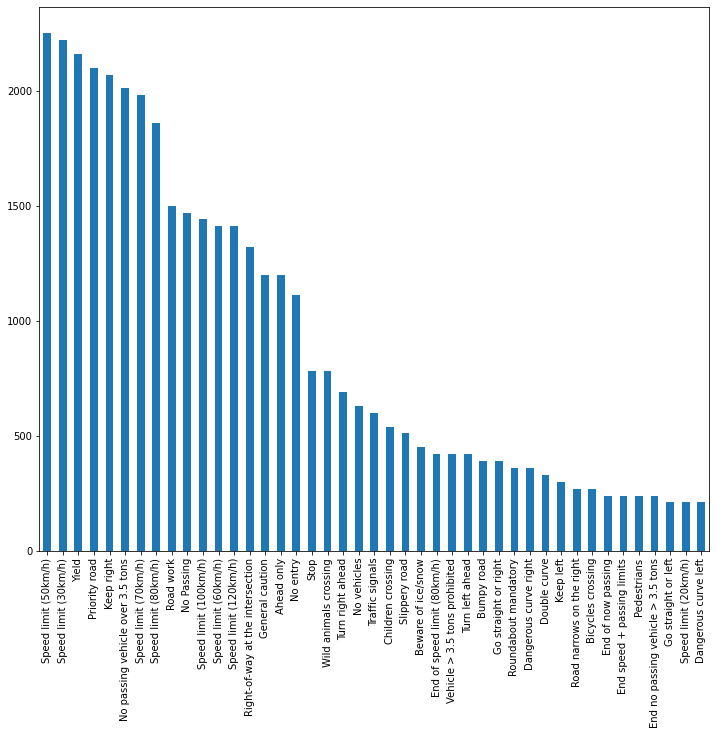

In [ ]:
train_labels_df['Category'].value_counts().plot(kind='bar',figsize=(12,10))

In [ ]:
test_labels_df = pd.DataFrame({'Labels': test_labels})
test_labels_df['Labels'] = test_labels_df['Labels'].astype(str).astype(int)
test_labels_df["Category"] = test_labels_df.apply (lambda row: label_text(row) , axis =1)
test_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Labels    12630 non-null  int64 
 1   Category  12630 non-null  object
dtypes: int64(1), object(1)
memory usage: 197.5+ KB


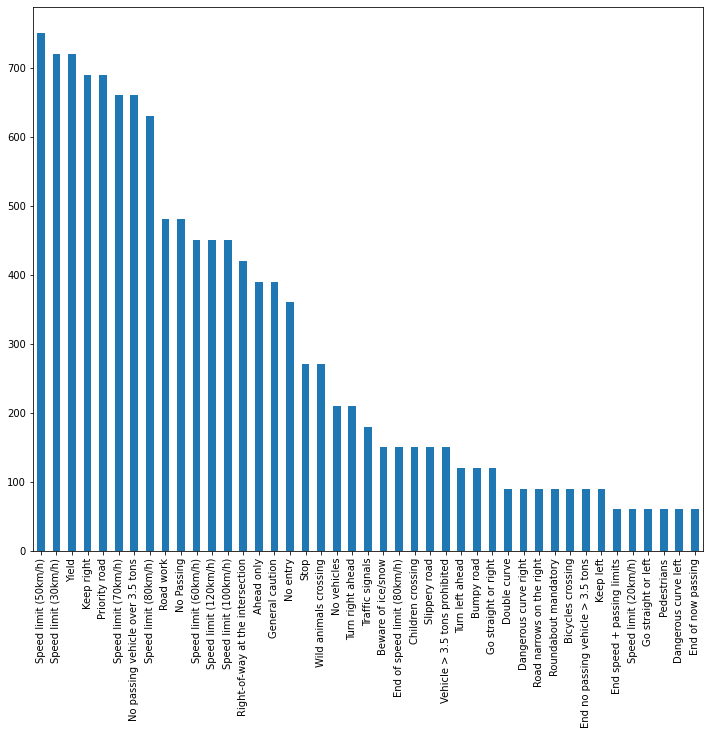

In [ ]:
test_labels_df['Category'].value_counts().plot(kind='bar',figsize=(12,10))

## Prepare the model's training and testing data, as well as convert the labels and data to the format or shape required by the model

In [ ]:
color_img_arr = (color_img_arr/255.0).astype('float32')
grayscale_img_arr = (grayscale_img_arr/255.0).astype('float32')
test_images = (test_images/255.0).astype('float32')
gray_test_images = (gray_test_images/255.0).astype('float32')

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
train_labels_oh = to_categorical(train_labels)
test_labels_oh = to_categorical(test_labels)

# Create two CNN models, one with color images and the other with greyscale images, using the following steps:   

In [ ]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import random

In [ ]:
random.seed(42)
tf.random.set_seed(42)

## Color Model

In [ ]:
color_model = Sequential()

color_model.add(Conv2D(filters=32, kernel_size = 5, padding ="same", activation="relu", input_shape=(30,30,3)))
color_model.add(MaxPooling2D(pool_size=(2,2)))
color_model.add(Dropout(0.2))

color_model.add(Conv2D(filters=16, kernel_size = 3, padding ="same", activation="relu"))
color_model.add(MaxPooling2D(pool_size=(2,2)))
color_model.add(Dropout(0.2))

color_model.add(Flatten())
color_model.add(Dense(units=512, activation="relu"))
color_model.add(Dropout(0.2))

color_model.add(Dense(units=43, activation="softmax"))

color_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 30, 30, 32)        2432      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_31 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 15, 15, 16)        4624      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 dropout_32 (Dropout)        (None, 7, 7, 16)        

In [ ]:
color_model.compile(optimizer="Adam", loss="categorical_crossentropy",
                    metrics=['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
from sklearn.utils import shuffle

In [ ]:
X_col, y_col = shuffle(color_img_arr, train_labels_oh)

In [ ]:
history_color = color_model.fit(X_col, y_col,
                                batch_size=32,
                                validation_split=0.2,
                                epochs=20,
                                verbose=1,
                                callbacks=callbacks)

Epoch 1/20
981/981 [==============================] - 5s 5ms/step - loss: 0.5495 - accuracy: 0.8370 - val_loss: 0.1791 - val_accuracy: 0.9568
Epoch 2/20
981/981 [==============================] - 5s 5ms/step - loss: 0.2346 - accuracy: 0.9285 - val_loss: 0.1111 - val_accuracy: 0.9741
Epoch 3/20
981/981 [==============================] - 5s 5ms/step - loss: 0.1612 - accuracy: 0.9519 - val_loss: 0.0686 - val_accuracy: 0.9844
Epoch 4/20
981/981 [==============================] - 5s 5ms/step - loss: 0.1226 - accuracy: 0.9619 - val_loss: 0.0520 - val_accuracy: 0.9889
Epoch 5/20
981/981 [==============================] - 5s 5ms/step - loss: 0.1051 - accuracy: 0.9670 - val_loss: 0.0506 - val_accuracy: 0.9889
Epoch 6/20
981/981 [==============================] - 5s 5ms/step - loss: 0.0933 - accuracy: 0.9697 - val_loss: 0.0437 - val_accuracy: 0.9894
Epoch 7/20
981/981 [==============================] - 5s 5ms/step - loss: 0.0812 - accuracy: 0.9748 - val_loss: 0.0442 - val_accuracy: 0.9884
Epoch 

## Grayscale Model

In [ ]:
gray_model = Sequential()

gray_model.add(Conv2D(filters=32, kernel_size = 5, padding ="same", activation="relu", input_shape=(30,30,1)))
gray_model.add(MaxPooling2D(pool_size=(2,2)))
gray_model.add(Dropout(0.2))

gray_model.add(Conv2D(filters=16, kernel_size = 3, padding ="same", activation="relu"))
gray_model.add(MaxPooling2D(pool_size=(2,2)))
gray_model.add(Dropout(0.2))

gray_model.add(Flatten())
gray_model.add(Dense(units=512, activation="relu"))
gray_model.add(Dropout(0.2))

gray_model.add(Dense(units=43, activation="softmax"))

gray_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 30, 30, 32)        832       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_37 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 15, 15, 16)        4624      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 dropout_38 (Dropout)        (None, 7, 7, 16)        

In [ ]:
gray_model.compile(optimizer="Adam", loss="categorical_crossentropy",
                    metrics=['accuracy'])

In [ ]:
X_gray, y_gray = shuffle(grayscale_img_arr, train_labels_oh)

In [ ]:
history_gray = gray_model.fit(X_gray, y_gray,
                              batch_size=32,
                              validation_split=0.2,
                              epochs=20,
                              verbose=1,
                              callbacks=callbacks)

Epoch 1/20
981/981 [==============================] - 5s 5ms/step - loss: 1.4594 - accuracy: 0.5936 - val_loss: 0.3821 - val_accuracy: 0.9028
Epoch 2/20
981/981 [==============================] - 4s 4ms/step - loss: 0.3773 - accuracy: 0.8885 - val_loss: 0.1730 - val_accuracy: 0.9591
Epoch 3/20
981/981 [==============================] - 4s 4ms/step - loss: 0.2294 - accuracy: 0.9311 - val_loss: 0.1037 - val_accuracy: 0.9774
Epoch 4/20
981/981 [==============================] - 4s 4ms/step - loss: 0.1661 - accuracy: 0.9504 - val_loss: 0.0808 - val_accuracy: 0.9815
Epoch 5/20
981/981 [==============================] - 4s 4ms/step - loss: 0.1349 - accuracy: 0.9607 - val_loss: 0.0726 - val_accuracy: 0.9829
Epoch 6/20
981/981 [==============================] - 4s 4ms/step - loss: 0.1044 - accuracy: 0.9674 - val_loss: 0.0570 - val_accuracy: 0.9880
Epoch 7/20
981/981 [==============================] - 4s 4ms/step - loss: 0.0919 - accuracy: 0.9709 - val_loss: 0.0643 - val_accuracy: 0.9855
Epoch 

##Plot the training and validation accuracy for color and grayscale models

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

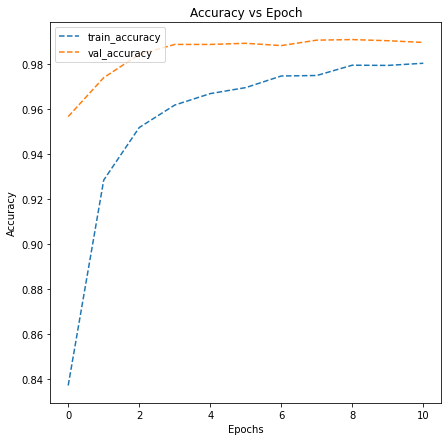

In [ ]:
plot_accuracy(history_color)

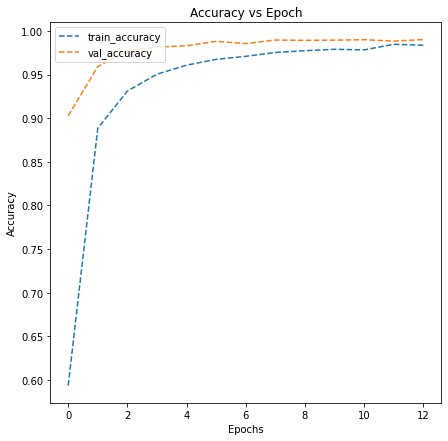

In [ ]:
plot_accuracy(history_gray)

## Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model's classes are good 



In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

### Color

In [ ]:
def evaluate_model(model, images, labels_oh):
  accuracy = model.evaluate(images, labels_oh)
  print('\n', 'Test_Accuracy: ', accuracy[1],'\n')
  
  pred = model.predict(images)
  pred = np.argmax(pred, axis=1)
  y_true = np.argmax(labels_oh, axis=1)
  
  print(classification_report(y_true, pred))

In [ ]:
evaluate_model(color_model, test_images, test_labels_oh)

395/395 [==============================] - 2s 4ms/step - loss: 0.3127 - accuracy: 0.9348

 Test_Accuracy:  0.9348376989364624 

              precision    recall  f1-score   support

           0       0.87      0.68      0.77        60
           1       0.89      0.93      0.91       720
           2       0.89      0.97      0.93       750
           3       0.93      0.92      0.92       450
           4       0.92      0.93      0.93       660
           5       0.89      0.85      0.87       630
           6       0.96      0.82      0.88       150
           7       0.97      0.87      0.92       450
           8       0.96      0.89      0.92       450
           9       0.95      1.00      0.97       480
          10       0.98      0.98      0.98       660
          11       0.96      0.96      0.96       420
          12       0.92      0.98      0.95       690
          13       0.97      0.99      0.98       720
          14       1.00      1.00      1.00       270
       

In [ ]:
evaluate_model(gray_model, gray_test_images, test_labels_oh)

395/395 [==============================] - 1s 4ms/step - loss: 0.3068 - accuracy: 0.9407

 Test_Accuracy:  0.9406967759132385 

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        60
           1       0.92      0.98      0.95       720
           2       0.99      0.95      0.97       750
           3       0.86      0.97      0.91       450
           4       0.95      0.97      0.96       660
           5       0.94      0.93      0.93       630
           6       1.00      0.82      0.90       150
           7       0.96      0.87      0.91       450
           8       0.91      0.94      0.93       450
           9       0.98      0.95      0.97       480
          10       0.96      0.99      0.97       660
          11       0.87      0.97      0.92       420
          12       0.98      0.97      0.97       690
          13       0.97      1.00      0.98       720
          14       0.95      0.98      0.97       270
       

## Compare the color and grayscale CNN models and analyze which model is better

The color and grayscale model have very similar perfromance. 

Test Accuracy:
* Color - 93.48%
* Grayscale - 94.07%

Weighted Average Presicion
* Color - 0.94
* Grayscale - 0.94

Weighted Average Recall
* Color - 0.93
* Grayscale - 0.94

Weighted Average F1-score
* Color - 0.93
* Grayscale - 0.94

The greyscale model performs slightly better than the color model. My guess is that some of the colors may confuse the model slightly and that the shapes are more important overall.